# The Galactic Voyager: Predicting the Transported Settlers

Welcome to the Galactic Voyager Anomaly Lab! In this lab, you will be working with data from the Galactic Voyager, an intergalactic cruiser that faced an unexpected event while navigating near Alpha Centauri en route to its primary destination—the torrid 55 Cancri E.

## Objective

Your mission is to predict which settlers were transported to an alternate dimension during the Galactic Voyager's encounter with a spacetime distortion. To aid you in making these predictions, you have been provided with a dataset containing personal records salvaged from the ship's compromised database.

## Dataset

The dataset consists of personal records of the settlers. Here's a brief overview of the data fields:

- `PassengerId`: A unique Id for each settler.
- `HomeGalaxy`: The galaxy the settler departed from.
- `CryoSleep`: Indicates if the settler was in suspended animation.
- `Cabin`: The cabin number where the settler stayed.
- `Destination`: The planet the settler intended to reach.
- ... [Other Fields]

Your primary objective is to predict the `Transported` field, which indicates whether a settler was transported to an alternate dimension.

## Getting Started with TensorFlow and Random Forest Model

To begin, you'll need to use the TensorFlow library and specifically work with the Random Forest model. Here's a basic template to help you get started:

```python
import tensorflow as tf     #make sure to install tensorflow in googleColab by running the following command: pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
import pandas as pd


# Load the dataset
dataset_df = pd.read_csv('path_to_train.csv')

# Convert the dataset to TensorFlow format
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Transported")

# Create a Random Forest model
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

# Evaluate the model (Optional)
model.evaluate(train_ds)


#**Introduction**


##**Lab Setup and Data Loading**
This notebook walks through the step-by-step procedure of making predictions ranging from data aquisition to model evaluation. First, we setup the lab by installing the tensorflow decision forests using pip. We mainly explore the random forest model from tensor flow in this lab.

In [1]:
pip install tensorflow_decision_forests

##**Import the Libraries**

In [2]:
# Import necessary libraries
import itertools
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
import tensorflow_decision_forests as tfdf
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

##**Load the Dataset**
train.csv: Contains personal details of approximately two-thirds (around 8700) of the
travelers, intended for training purposes.

o PassengerId: A distinct identifier for every traveler. The format is gggg_pp, where 'gggg' denotes a group the traveler is associated with, and 'pp' signifies their position within that group. Group members are often related but not always.

o HomePlanet: Represents the planet from which the traveler embarked, usually
their primary residence.

o CryoSleep: Specifies if the traveler chose suspended animation for the journey's duration. Those in cryosleep remain in their rooms.

o Cabin: The room number assigned to the traveler. The format is deck/num/side,
with 'side' being either 'P' (Port) or 'S' (Starboard).

o Destination: The planet the traveler intends to disembark at.

o Age: The traveler's age.

o VIP: Indicates if the traveler availed the exclusive VIP services during the journey.

o RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Represents the billed
amount by the traveler at each of the Galactic Voyager's luxury facilities.

o Name: The traveler's full name.

o Transported: Determines if the traveler was shifted to a different dimension. This is the prediction target.

In [3]:
from google.colab import drive
from google.colab import files

# Upload both train file to the drive
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
# Upload both test file to the drive
uploaded1 = files.upload()

Saving test.csv to test.csv


##**Read the Data using Pandas Dataframe**

In [5]:
import io

# Read the train data using pandas dataframe
original_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded1['test.csv']))

In [6]:
# View the data
original_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


##**Data Exploration**

We explore the data by performing the exploratory Data Analysis(EDA). This is because, the data can easily understood using the Visualizations.

In [7]:
# Get the statistical insights of all the columns in Dataframe
original_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
# Get the dtype of each column
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


The majority of the columns in the dataframe are categorical and few are discrete.

##Exploratory Data Analysis(EDA)

We plot the distribution chart of each numerical column to understand how values are distributed. We can have a look where more values lie like in positive, negative, or at the center(mean).

Later, we look at the distribution of categories in the target variable 'Transported'. This tells us what percent of passengers travelled to different realm and what didn't.  It gives us whether the target variable is balanced or not.






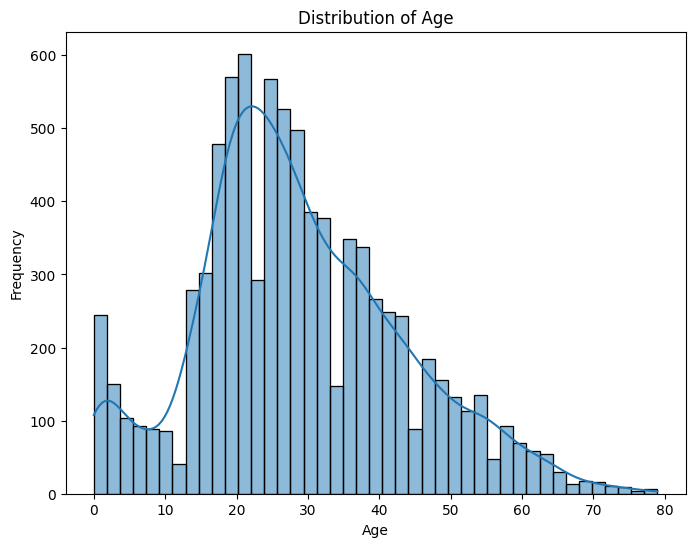

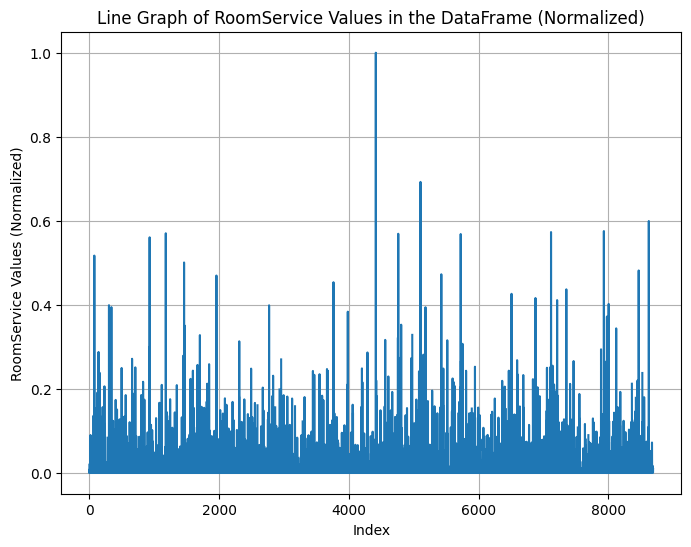

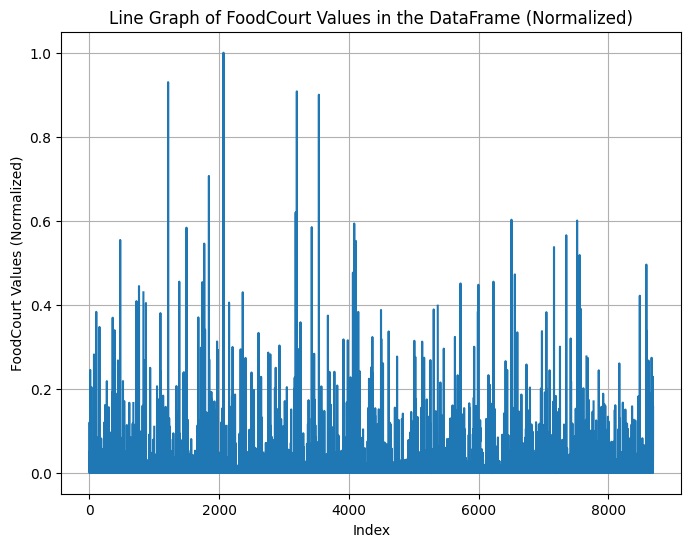

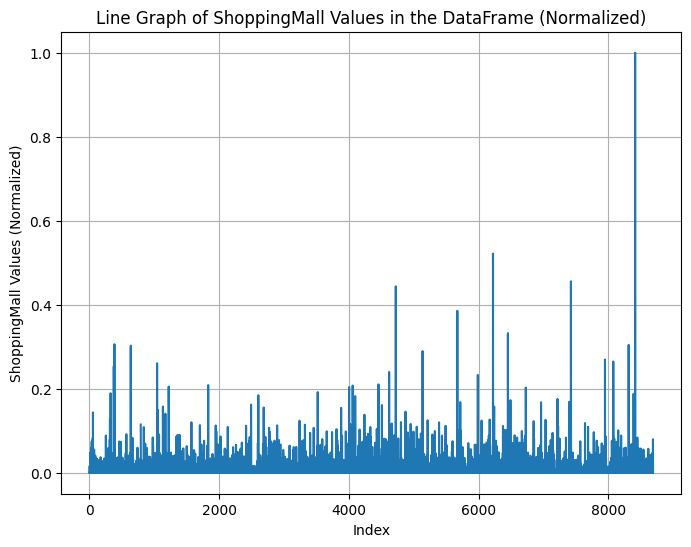

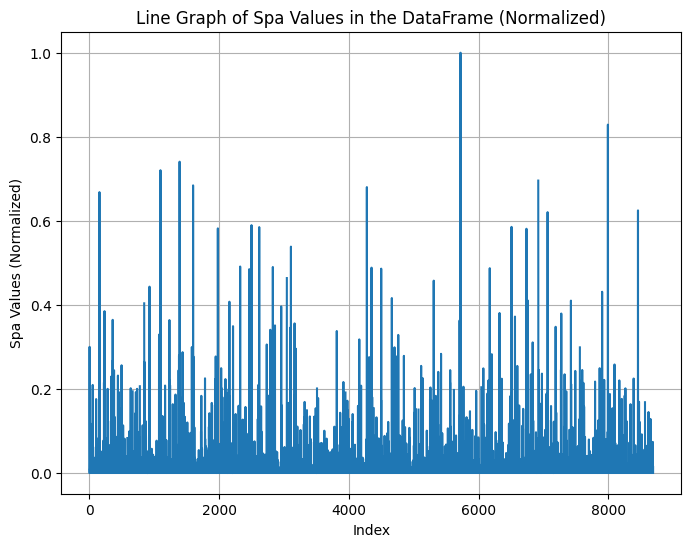

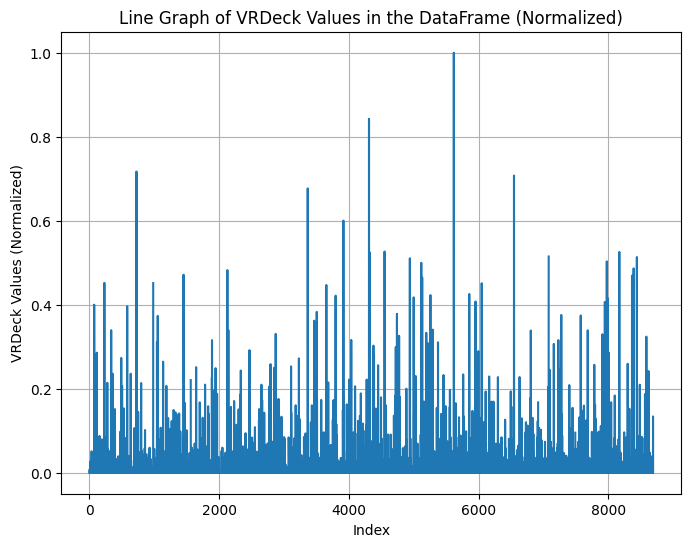

In [9]:
# List the columns with numerical values
numerical_columns = ['Age',	'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck']

# Plot the histplot for column 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(data=original_df, x= 'Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(f'Distribution of Age')
plt.show()

"""
# Plot the Line graph for the remaining columns
for i, col in enumerate(numerical_columns):
  if i>0:
    plt.figure(figsize=(8, 6))
    plt.plot(original_df[col], linestyle='-')
    plt.xlabel('Index')
    plt.ylabel(f'{col} Values')
    plt.title(f'Line Graph of {col} Values in the DataFrame')
    plt.grid(True)
    plt.show()

    """

for i, col in enumerate(numerical_columns):
    if i > 0:
      plt.figure(figsize=(8, 6))
      # Normalize the data
      normalized_data = (original_df[col] - original_df[col].min()) / (original_df[col].max() - original_df[col].min())
      plt.plot(normalized_data, linestyle='-')
      plt.xlabel('Index')
      plt.ylabel(f'{col} Values (Normalized)')
      plt.title(f'Line Graph of {col} Values in the DataFrame (Normalized)')
      plt.grid(True)
      plt.show()

Now, Lets see the distribution of values in the Target Variable 'Transported'.

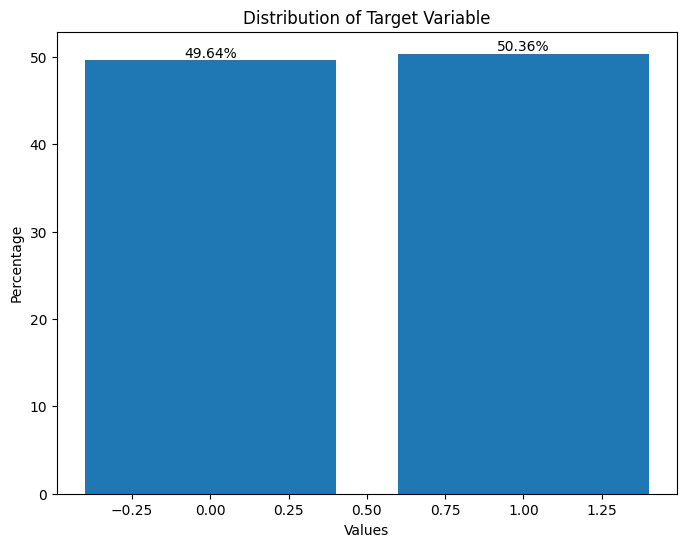

In [10]:
# No of Counts of values within the column 'Transported'
value_counts = original_df['Transported'].value_counts(normalize=True) * 100

# Plot the bar graph for the count of values
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values)

# Add percentages on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}%", ha='center', va='bottom')

plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('Distribution of Target Variable')
plt.show()

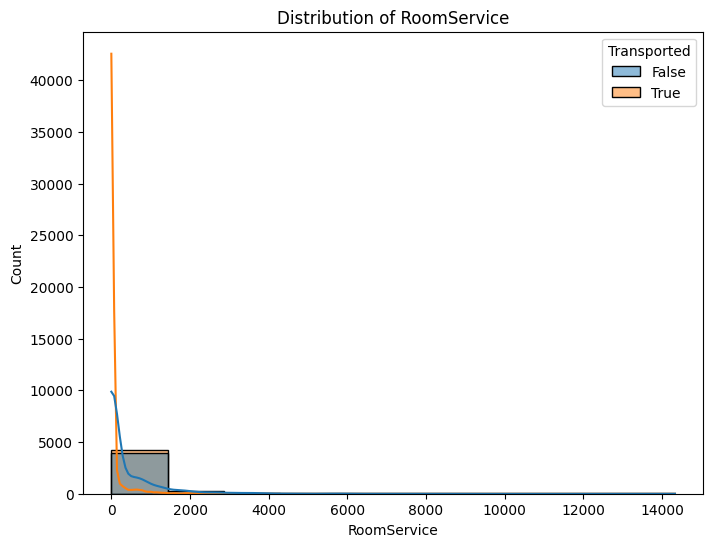

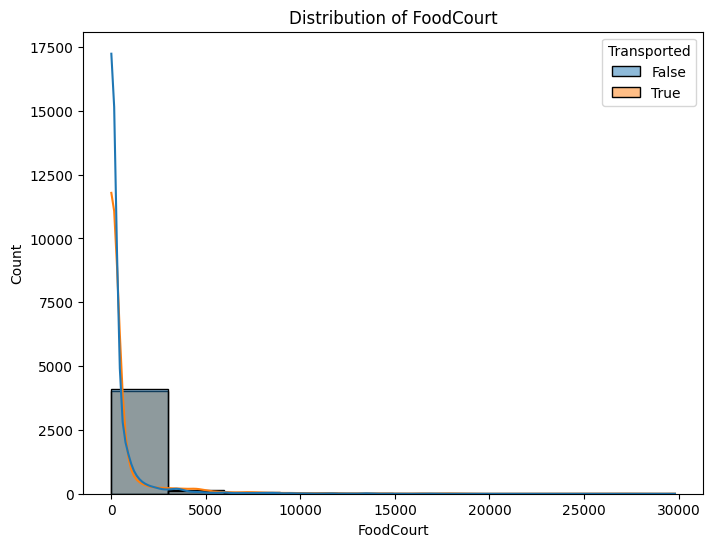

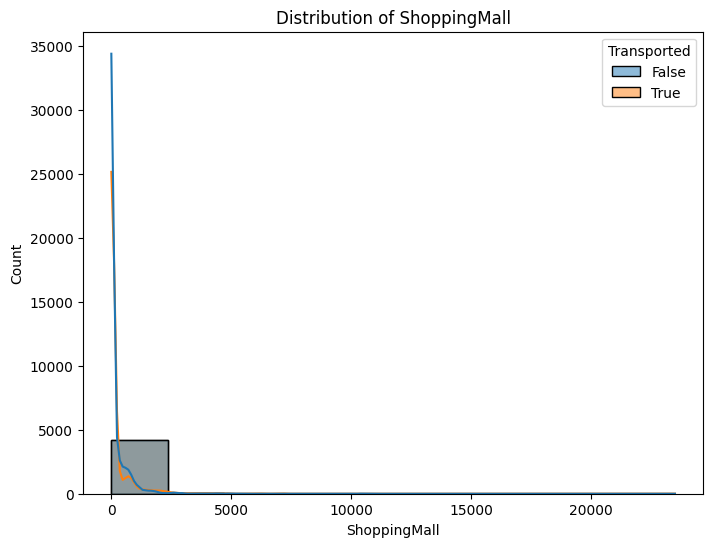

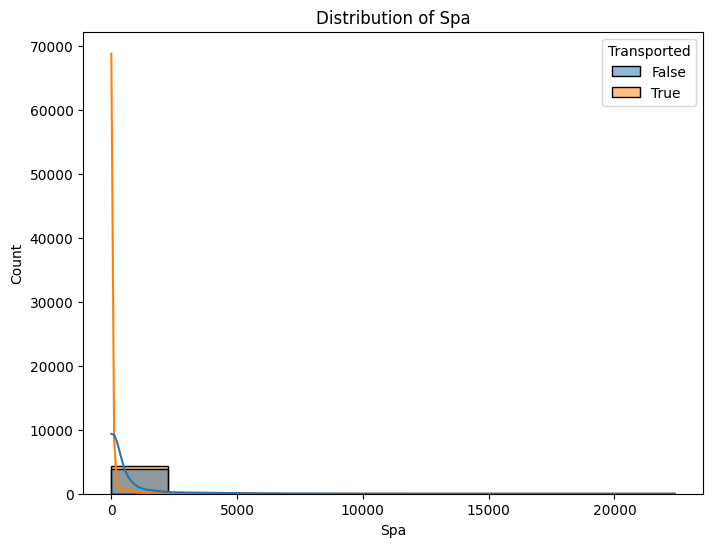

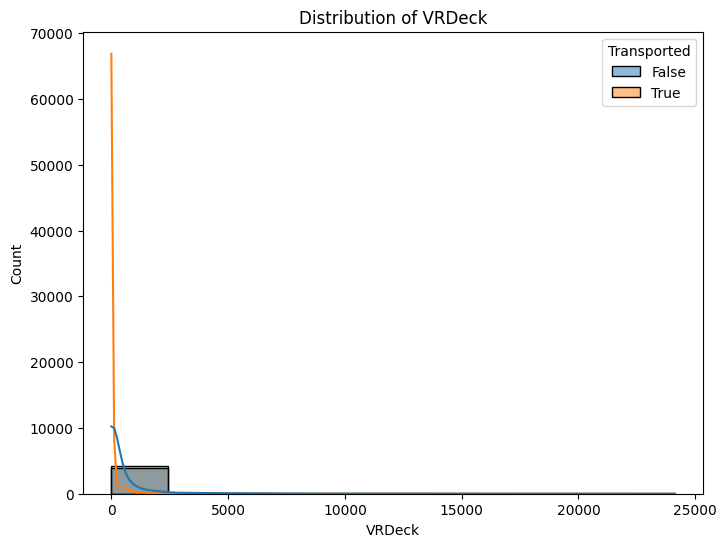

In [11]:
# Plot histplot for each numerical column w.r.t the target variable
for col in numerical_columns[1:]:
  plt.figure(figsize=(8, 6))
  sns.histplot(original_df, x= col, hue = 'Transported', kde=True, bins = 10)
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.title(f'Distribution of {col}')
  plt.show()

Let's look at the visualizations for categorical features in the dataframe.

The graph for the HomePlanet is


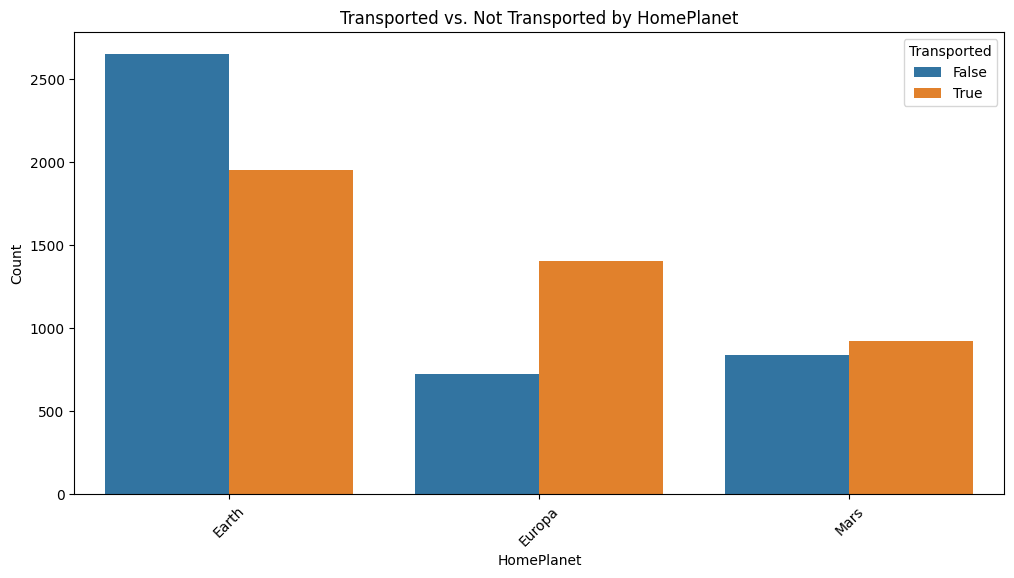

The graph for the CryoSleep is


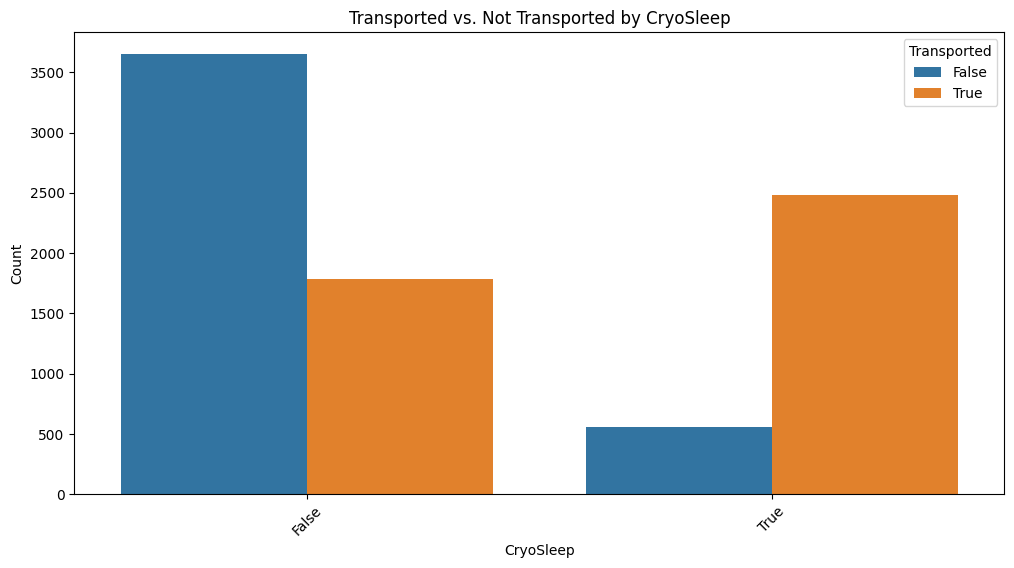

The graph for the Destination is


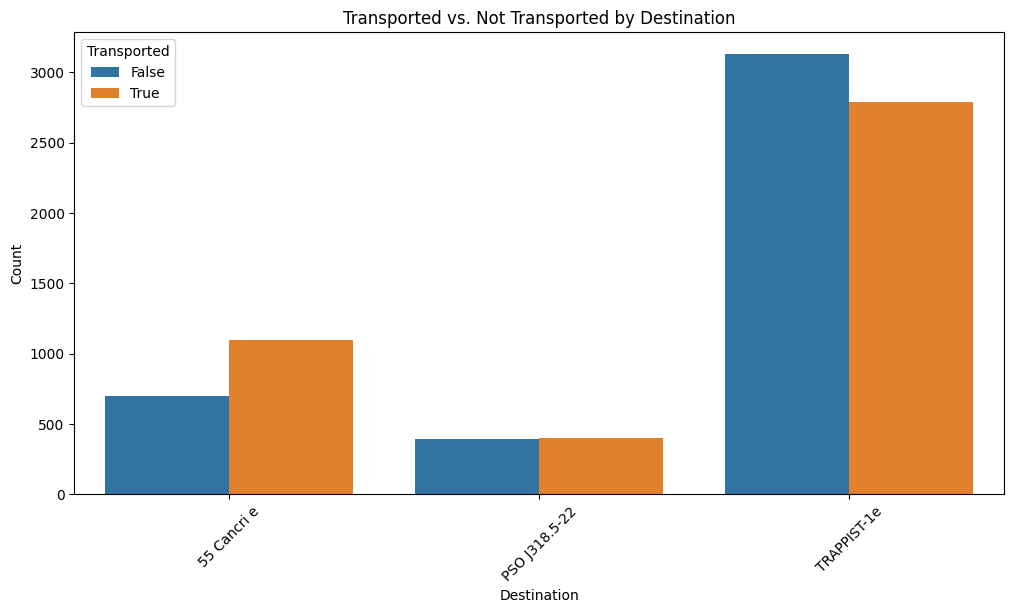

The graph for the VIP is


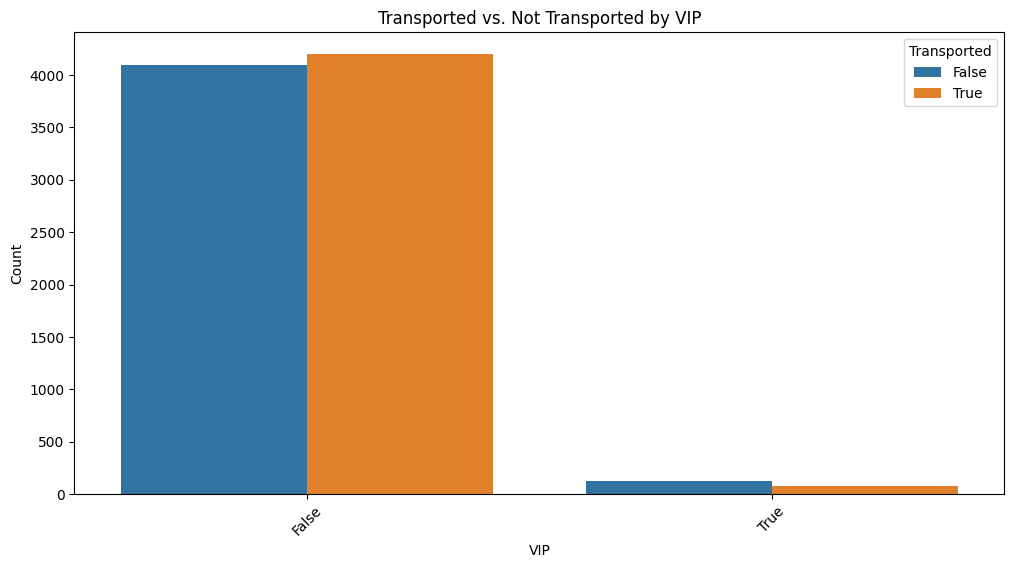

In [12]:
# List the categorical features present in the Dataframe
categ_columns = ['HomePlanet',	'CryoSleep',	'Destination',	'VIP', 'Transported']

# Itherate through the categorical columns to plot a bar graph by target variable
for col in categ_columns[:-1]:
  print(f"The graph for the {col} is")
  x = original_df.groupby([col, 'Transported']).size().reset_index(name='Count')

  plt.figure(figsize=(12, 6))
  sns.barplot(data=x, x=col, y='Count', hue='Transported')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title(f'Transported vs. Not Transported by {col}')
  plt.xticks(rotation=45)
  plt.show()

In [13]:
# Check if the columns have missing values
original_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## **Data Pre-processing**
Data preprocessing is the process of cleaning and transforming raw data into a format that can be understood and analyzed by computers and machine learning. The goal of data preprocessing is to make the data accurate, consistent, and suitable for analysis.



1.   **Tranform the data**

        It involves transforming or encoding the categorical values in to numerical format. For the categorical columns, To make the training faster and efficient we convert the values into numerical labels which helps the model to understand the relation among other categories present within the column.

2.   **Handling Missing Values**

        As we found that every column has some missing values in it. Though the tensorflow handles the missing value in non categorical columns but it might not be effective in handling categorical columns. So I dropped the rows with NA values from the dataframe. For the non-categorical columns, I have replaced the missing values with mode or mean of the entire distribution.

3.   **Feature engineering**

        We use feature engineering tasks like segmenting the composite columns to multiple cols. This involves selecting, extracting, or creating relevant features that could enhance the representation and predictive power of the data.

        Composite columns like Passenger_ID and Cabin. The id seems to be in the format gggg_pp, where gggg is the group no. and pp is the individual no. So, we have separated those in to two different columns. It is beacuse there might be cases where in an  individual passenger transported so it is likely that other travelers in the same group can also be transported.

In [14]:
# Split the composite column 'Cabin' to three parts ['Deck', 'Cabin_num', 'Side'] for both traina nd test
original_df[['Deck', 'Cabin_num', 'Side']] = original_df['Cabin'].str.split('/', 2, expand=True)
test_df[['Deck', 'Cabin_num', 'Side']] = test_df['Cabin'].str.split('/', 2, expand=True)

<ipython-input-14-7eeaf2b79615>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  original_df[['Deck', 'Cabin_num', 'Side']] = original_df['Cabin'].str.split('/', 2, expand=True)
<ipython-input-14-7eeaf2b79615>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  test_df[['Deck', 'Cabin_num', 'Side']] = test_df['Cabin'].str.split('/', 2, expand=True)


In [15]:
# Drop the unnecessary columns
original_df = original_df.drop(['Cabin','Name'],axis=1)
test_df = test_df.drop(['Cabin','Name'],axis=1)
original_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [16]:
# List the categorical  columns except for the target variable.
columns = ['HomePlanet',	'CryoSleep',	'Destination',	'VIP']
df = original_df.copy()

for col in columns:
  # Calculate value counts for each unique value in the column
  value_counts = df[col].value_counts()

  # Create a dictionary to map values to their respective counts
  value_count_mapping = dict(zip(value_counts.index, range(len(value_counts))))
  print(value_count_mapping)

  # Use the map function to replace values in the column with their counts
  df[col] = df[col].map(value_count_mapping)

{'Earth': 0, 'Europa': 1, 'Mars': 2}
{False: 0, True: 1}
{'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2}
{False: 0, True: 1}


In [17]:
# Replace or map the labels for taget variable
df['Transported'].replace({False: 0.0, True: 1.0}, inplace=True)

#Test data
test_df['HomePlanet'].replace({'Earth': 0, 'Europa': 1, 'Mars': 2}, inplace=True)
test_df['CryoSleep'].replace({False: 0, True: 1}, inplace=True)
test_df['Destination'].replace({'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2}, inplace=True)
test_df['VIP'].replace({False: 0.0, True: 1.0}, inplace=True)

In [18]:
test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
0,0013_01,0.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,0.0,0.0,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,1.0,0.0,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,0.0,0.0,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0.0,1.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,G,1496,S
4273,9269_01,0.0,0.0,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN
4274,9271_01,2.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,D,296,P
4275,9273_01,1.0,0.0,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,D,297,P


In [19]:
# Iterate through the categorical columsn to fetch the value counts of each one
for col in categ_columns:

  # Calculate value counts for each unique value in the column
  value_counts = df[col].value_counts()
  print(f"The number of categories found in {col} are", value_counts)

The number of categories found in HomePlanet are 0.0    4602
1.0    2131
2.0    1759
Name: HomePlanet, dtype: int64
The number of categories found in CryoSleep are 0.0    5439
1.0    3037
Name: CryoSleep, dtype: int64
The number of categories found in Destination are 0.0    5915
1.0    1800
2.0     796
Name: Destination, dtype: int64
The number of categories found in VIP are 0.0    8291
1.0     199
Name: VIP, dtype: int64
The number of categories found in Transported are 1.0    4378
0.0    4315
Name: Transported, dtype: int64


The graph for the HomePlanet is


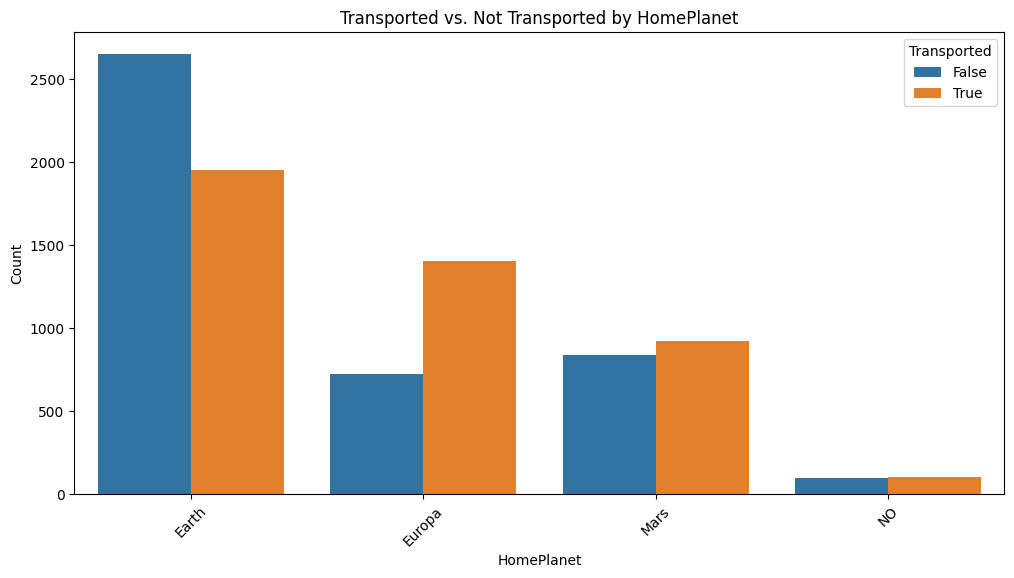

The graph for the CryoSleep is


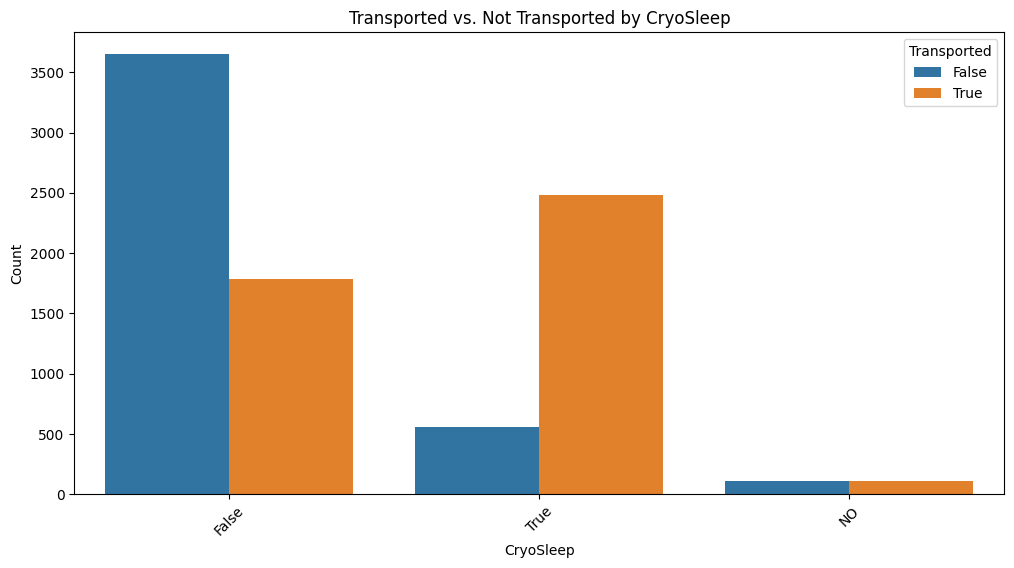

The graph for the Destination is


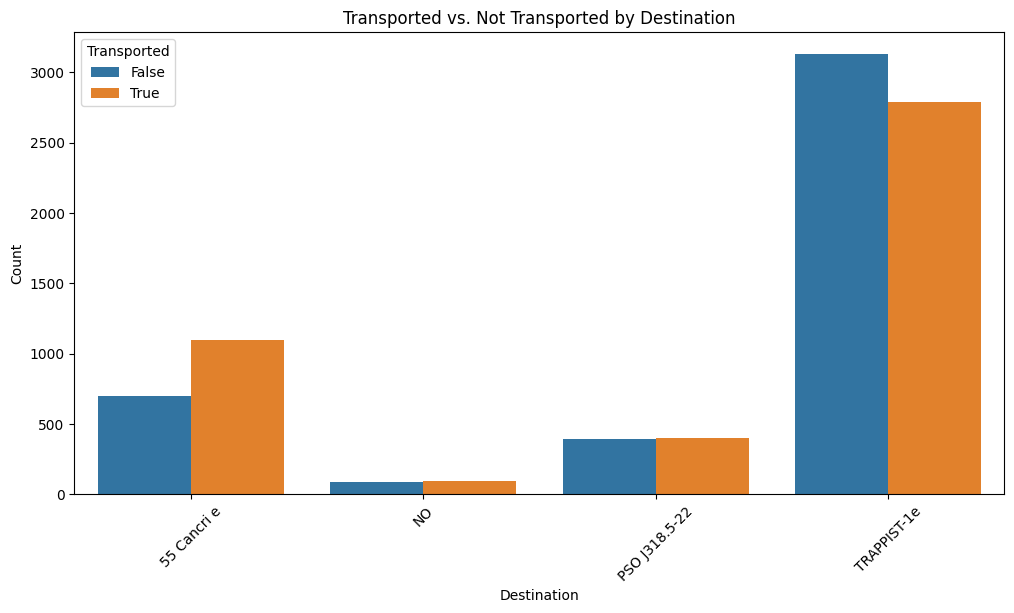

The graph for the VIP is


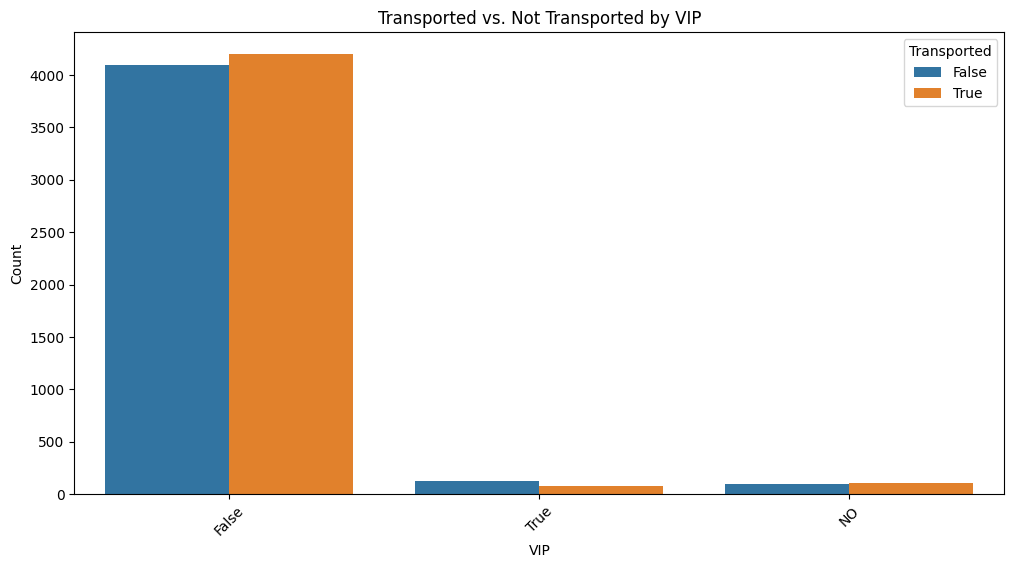

In [20]:
# Replace missing value with 'NO' for better visulaization of plots
for col in categ_columns:
  original_df[col] = original_df[col].fillna('NO')

# Plot the bar graph on every categorical columns after handling missing values.
for col in categ_columns[:-1]:
  print(f"The graph for the {col} is")
  x = original_df.groupby([col, 'Transported']).size().reset_index(name='Count')

  plt.figure(figsize=(12, 6))
  sns.barplot(data=x, x=col, y='Count', hue='Transported')
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.title(f'Transported vs. Not Transported by {col}')
  plt.xticks(rotation=45)
  plt.show()

In [21]:
# Split the Passenger_Id into 'Group_no' and 'Individual_Id' columns
df[['Group_no', 'Individual_Id']] = df['PassengerId'].str.split('_', 1, expand=True)

# Convert 'Group_no' and 'Individual_Id' columns to integers
df['Group_no'] = df['Group_no'].astype(int)
df['Individual_Id'] = df['Individual_Id'].astype(int)

# Count the number of individuals within each group
group_counts = df['Group_no'].value_counts()

# Count the number of groups with a single individual
single_individual_groups = group_counts[group_counts == 1]

# Print the results
print("Number of individuals within each group:")
print(group_counts)

print("\nNumber of groups with a single individual:")
print(single_individual_groups)

Number of individuals within each group:
4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: Group_no, Length: 6217, dtype: int64

Number of groups with a single individual:
6503    1
5402    1
5238    1
6508    1
6509    1
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: Group_no, Length: 4805, dtype: int64


<ipython-input-21-33393809c02d>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Group_no', 'Individual_Id']] = df['PassengerId'].str.split('_', 1, expand=True)


In [22]:
# Test data
test_df[['Group_no', 'Individual_Id']] = test_df['PassengerId'].str.split('_', 1, expand=True)

# Convert 'Group_no' and 'Individual_Id' columns to integers
test_df['Group_no'] = test_df['Group_no'].astype(int)
test_df['Individual_Id'] = test_df['Individual_Id'].astype(int)

<ipython-input-22-0052f69267f9>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  test_df[['Group_no', 'Individual_Id']] = test_df['PassengerId'].str.split('_', 1, expand=True)


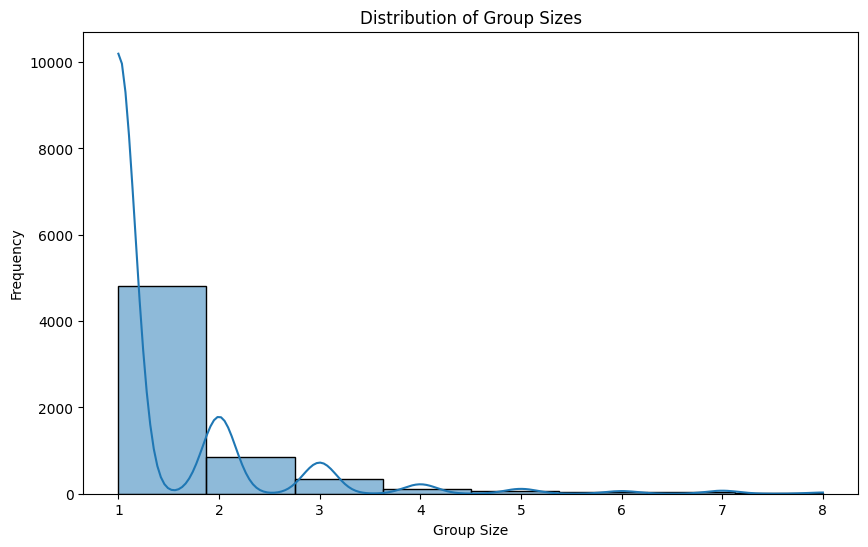

In [23]:
# Create a histogram (histplot) of group sizes
plt.figure(figsize=(10, 6))
sns.histplot(group_counts, bins=8, kde=True)
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.title('Distribution of Group Sizes')
plt.show()

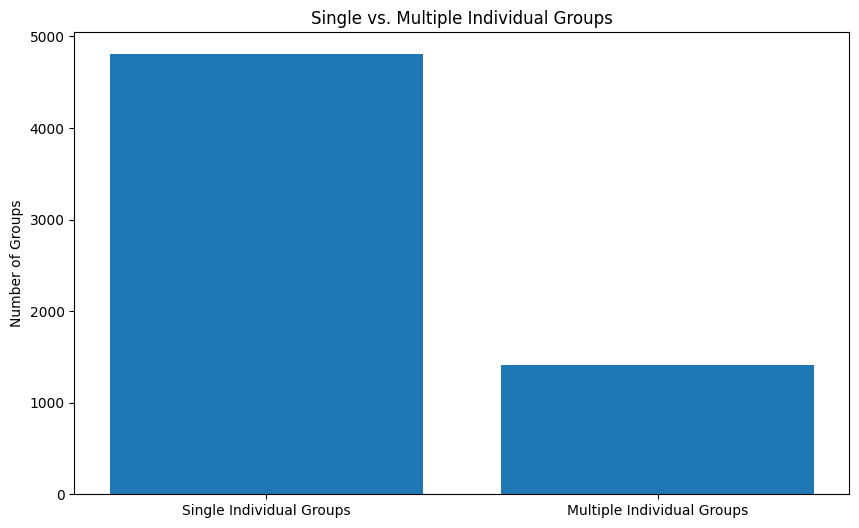

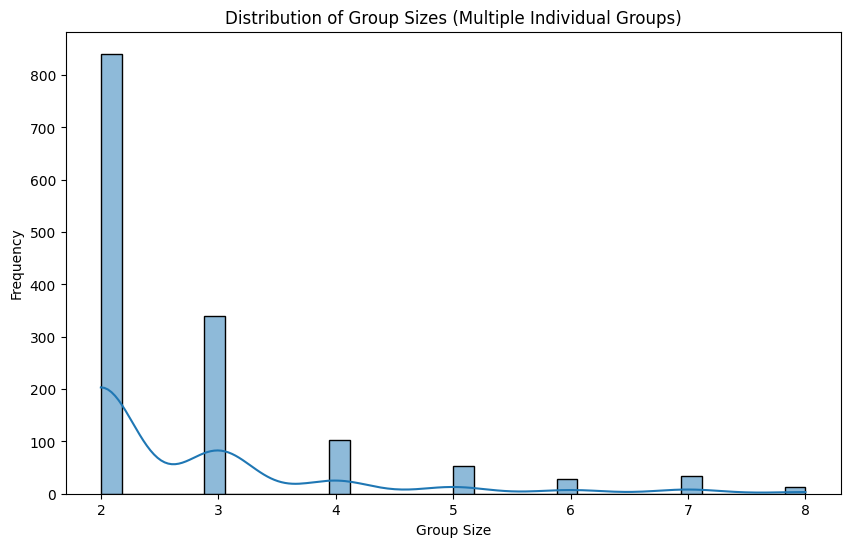

In [24]:
multiple_individual_groups = group_counts[group_counts > 1]

# Create a bar graph for groups with single vs. multiple individuals
plt.figure(figsize=(10, 6))
plt.bar(['Single Individual Groups', 'Multiple Individual Groups'], [len(single_individual_groups), len(multiple_individual_groups)])
plt.ylabel('Number of Groups')
plt.title('Single vs. Multiple Individual Groups')
plt.show()

# Create a line graph (histplot) for the distribution of group sizes in multiple individual groups
plt.figure(figsize=(10, 6))
sns.histplot(multiple_individual_groups, kde=True)
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.title('Distribution of Group Sizes (Multiple Individual Groups)')
plt.show()

In [25]:
# Check the missing values in df dataframe
df.isnull().sum()

PassengerId        0
HomePlanet       201
CryoSleep        217
Destination      182
Age              179
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Transported        0
Deck             199
Cabin_num        199
Side             199
Group_no           0
Individual_Id      0
dtype: int64

In [26]:
# Drop the rows with 'na'
df = df.dropna(subset = columns)
test_df = test_df.dropna(subset = columns)

In [27]:
# Remove unwanted and discrete columns
df = df.drop(columns=["PassengerId", "Cabin_num"], axis=1)
test_df = test_df.drop(columns=["PassengerId", "Cabin_num"], axis=1)

In [28]:
# Replace the missing values with median, mode or mean of the distribution based on column.
df[numerical_columns[1:]] = df[numerical_columns[1:]].fillna(df[numerical_columns[1:]].median())
df['Age'] =df['Age'].fillna(df['Age'].mean())
df['Deck'] =df['Deck'].fillna(df['Deck'].mode()[0])
df['Side'] =df['Side'].fillna(df['Side'].mode()[0])

# Test data
test_df[numerical_columns[1:]] = test_df[numerical_columns[1:]].fillna(test_df[numerical_columns[1:]].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Deck'] = test_df['Deck'].fillna(test_df['Deck'].mode()[0])
test_df['Side'] = test_df['Side'].fillna(test_df['Side'].mode()[0])

In [29]:
# Check if we still have the missing values
df.isnull().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
Deck             0
Side             0
Group_no         0
Individual_Id    0
dtype: int64

In [30]:
test_df.isnull().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Deck             0
Side             0
Group_no         0
Individual_Id    0
dtype: int64

In [31]:
df['Deck'].value_counts()

F    2704
G    2333
E     795
B     719
C     682
D     441
A     236
T       3
Name: Deck, dtype: int64

In [32]:
df['Side'].value_counts()

S    4082
P    3831
Name: Side, dtype: int64

In [33]:
categ_columns2 = ['Deck', 'Side']

for col in categ_columns2:
  # Calculate value counts for each unique value in the column
  value_counts = df[col].value_counts()

  # Create a dictionary to map values to their respective counts
  value_count_mapping = dict(zip(value_counts.index, range(len(value_counts))))
  print(value_count_mapping)

  # Use the map function to replace values in the column with their counts
  df[col] = df[col].map(value_count_mapping)

{'F': 0, 'G': 1, 'E': 2, 'B': 3, 'C': 4, 'D': 5, 'A': 6, 'T': 7}
{'S': 0, 'P': 1}


In [34]:
# Test data
test_df['Deck'].replace({'F': 0, 'G': 1, 'E': 2, 'B': 3, 'C': 4, 'D': 5, 'A': 6, 'T': 7}, inplace=True)
test_df['Side'].replace({'S': 0, 'P': 1}, inplace=True)

In [36]:
age_bins = [0,20,30,40,100]
age_label = [1, 2, 3, 4]

# Dividing age in to several categories
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_label, right=False, include_lowest=True)

df=df.drop(columns=["Age"],axis=1)

KeyError: ignored

In [37]:
# test data
test_df['Age_group'] = pd.cut(test_df['Age'], bins=age_bins, labels=age_label, right=False, include_lowest=True)
test_df = test_df.drop(columns=["Age"],axis=1)

In [38]:
df.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Group_no,Individual_Id,Age_group
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,1,1,3
1,0.0,0.0,0.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,0,0,2,1,2
2,1.0,0.0,0.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,6,0,3,1,4
3,1.0,0.0,0.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,6,0,3,2,3
4,0.0,0.0,0.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,0,0,4,1,1


In [39]:
# Covert the float to do integer
df[['HomePlanet',	'CryoSleep',	'Destination',	'VIP',	'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck',	'Age_group', 'Transported']] = df[['HomePlanet',	'CryoSleep',	'Destination',	'VIP',	'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck', 'Age_group',	'Transported']].astype(int)

test_df[['HomePlanet',	'CryoSleep',	'Destination',	'VIP',	'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck',	'Age_group']] = test_df[['HomePlanet',	'CryoSleep',	'Destination',	'VIP',	'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck', 'Age_group']].astype(int)

# Dataset Splitting

We divided the dataset into training and validation sets. So the valiadation or test set helps in
evaluating the model's performance on unseen data.

In [40]:
# Split the data into train set and test set with 20
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6339 examples in training, 1574 examples in testing.


In [41]:
label = "Transported"

#Convert the dataframe into tensor dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

In [42]:
train_ds_pd.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Group_no,Individual_Id,Age_group
0,1,0,0,0,0,0,0,0,0,0,3,1,1,1,3
2,1,0,0,1,43,3576,0,6715,49,0,6,0,3,1,4
3,1,0,0,0,0,1283,371,3329,193,0,6,0,3,2,3
4,0,0,0,0,303,70,151,565,2,1,0,0,4,1,1
5,0,0,2,0,0,483,0,291,0,1,0,1,5,1,4


# **Model Selection and Training**

Random forest model seems to be the right fit for this data. Since it is a binary classification problem, Random forest models can achieve high accuracy on binary classification tasks. This is because they combine the predictions of many individual decision trees, which helps to reduce overfitting and improve generalization performance.

Random forest models are robust to noise and outliers in the data. This is because they use bagging and bootstrap sampling to create different training datasets for each decision tree. This helps to reduce the model's reliance on any individual sample or feature.

Morover, TFDF models are typically faster to train than traditional random forest models. This is because TFDF uses TensorFlow to optimize the training process.

In [43]:
# List all the TFDF models
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

**Random Forest Tree Model**

In [44]:
# Create the randomforest model with default paarameters
RF_1 = tfdf.keras.RandomForestModel(compute_oob_performances=True)
RF_1.compile(metrics=["accuracy"])
RF_1.fit(x=train_ds)

Use /tmp/tmptrcjdocg as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.454646. Found 6339 examples.
Training model...
Model trained in 0:00:03.186728
Compiling model...
Model compiled.


In [45]:
# Define the hyperparameter search space
param_grid = {
    "num_trees": [115, 125, 135, 145, 155],
    "max_depth": [4, 8, 12, 16],
    "min_examples": [5, 10, 15, 20]
}

# Generate all combinations of parameters
param_combinations = list(ParameterGrid(param_grid))

# Initialize an empty list to store the model performance
model_performance = []

# Iterate over each combination of parameters
for params in param_combinations:
  RF_2 = tfdf.keras.RandomForestModel(compute_oob_performances=True, **params)
  RF_2.compile(metrics=["accuracy"])
  RF_2.fit(x=train_ds)

  # Evaluate the model on the validation dataset
  evaluation = RF_2.evaluate(valid_ds, return_dict=True)
  accuracy = evaluation['accuracy']

  # Store the model performance for this combination of parameters
  model_performance.append({
    'params': params,
    'accuracy': accuracy
  })

# Select the combination of parameters that results in the highest accuracy
#best_model_params = max(model_performance, key=lambda x: x['accuracy'])['params']
best_model = max(model_performance, key=lambda x: x['accuracy'])
best_accuracy = best_model['accuracy']
best_parameters = best_model['params']

print(f"Highest accuracy: {best_accuracy}")
print(f"Parameters for highest accuracy: {best_parameters}")

Use /tmp/tmppxsjmzd0 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.219723. Found 6339 examples.
Training model...
Model trained in 0:00:00.238819
Compiling model...
Model compiled.
2/2 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.7300
Use /tmp/tmp_q5er6w2 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.221006. Found 6339 examples.
Training model...
Model trained in 0:00:00.204751
Compiling model...
Model compiled.
2/2 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.7300
Use /tmp/tmp3suaemd2 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.227524. Found 6339 examples.
Training model...
Model trained in 0:00:00.212052
Compiling model...
Model compiled.
2/2 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.7300
Use /tmp/tmp04j9m7s2 as temporary training direc

Training dataset read in 0:00:00.232525. Found 6339 examples.
Training model...
Model trained in 0:00:00.242123
Compiling model...


Model compiled.


2/2 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.7306
Use /tmp/tmp15_7kk6k as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.229723. Found 6339 examples.
Training model...
Model trained in 0:00:00.253513
Compiling model...


Model compiled.


2/2 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.7300
Use /tmp/tmpkfkgnerq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.241938. Found 6339 examples.
Training model...
Model trained in 0:00:00.198883
Compiling model...
Model compiled.


2/2 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.7300
Use /tmp/tmp9bgpxmu_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.225563. Found 6339 examples.
Training model...
Model trained in 0:00:00.207662
Compiling model...
Model compiled.
2/2 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.7300
Use /tmp/tmprmjscmap as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.223946. Found 6339 examples.
Training model...
Model trained in 0:00:00.221572
Compiling model...
Model compiled.
2/2 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.7300
Use /tmp/tmpakl_m6j6 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.224106. Found 6339 examples.
Training model...
Model trained in 0:00:00.233179
Compiling model...
Model compiled.
2/2 [==============================] - 0s 8ms/ste

In [46]:
RF_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (14):
	Age_group
	CryoSleep
	Deck
	Destination
	FoodCourt
	Group_no
	HomePlanet
	Individual_Id
	RoomService
	ShoppingMall
	Side
	Spa
	VIP
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.           "Spa"  0.180179 ################
    2.   "RoomService"  0.178450 ###############
    3.     "CryoSleep"  0.175843 ###############
    4.        "VRDeck"  0.162166 #############
    5.     "FoodCourt"  0.144723 ##########
    6.  "ShoppingMall"  0.131676 ########
    7.      "Group_no"  0.129544 #######
    8.    "HomePlanet"  0.119897 ######
    9.          "Deck"  0.107850 ####
 

In [47]:
tfdf.model_plotter.plot_model_in_colab(RF_1, tree_idx=0, max_depth=3)

In [48]:
RF_2.summary()

Model: "random_forest_model_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (14):
	Age_group
	CryoSleep
	Deck
	Destination
	FoodCourt
	Group_no
	HomePlanet
	Individual_Id
	RoomService
	ShoppingMall
	Side
	Spa
	VIP
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.           "Spa"  0.216256 ################
    2.   "RoomService"  0.212208 ###############
    3.     "CryoSleep"  0.184136 ###########
    4.        "VRDeck"  0.182644 ###########
    5.     "FoodCourt"  0.161791 ########
    6.  "ShoppingMall"  0.148341 ######
    7.    "HomePlanet"  0.137349 #####
    8.      "Group_no"  0.133853 #####
    9.          "Deck"  0.118237 ##
   10.       

In [49]:
tfdf.model_plotter.plot_model_in_colab(RF_2, tree_idx=0, max_depth=3)

**Gradient Boosted Tree Model**

In [67]:
GB_1 = tfdf.keras.GradientBoostedTreesModel()
GB_1.compile(metrics=["accuracy"])
GB_1.fit(x=train_ds)

Use /tmp/tmpowq6ltha as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.228124. Found 6339 examples.
Training model...
Model trained in 0:00:01.666094
Compiling model...
Model compiled.


In [68]:
GB_1.summary()

Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (14):
	Age_group
	CryoSleep
	Deck
	Destination
	FoodCourt
	Group_no
	HomePlanet
	Individual_Id
	RoomService
	ShoppingMall
	Side
	Spa
	VIP
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.        "VRDeck"  0.237392 ################
    2.      "Group_no"  0.231331 ##############
    3.     "CryoSleep"  0.227254 #############
    4.           "Spa"  0.226192 #############
    5.   "RoomService"  0.207891 ########
    6.     "FoodCourt"  0.207424 ########
    7.          "Side"  0.197442 #####
    8.          "Deck"  0.196599 #####
    9.  "ShoppingMall"  0.193

In [40]:
# Define the hyperparameter search space for gradient boosted tree model
param_grid_GB = {
  "num_trees": [50, 75, 100, 125, 150],
  "max_depth": [4, 8, 16],
  "min_examples": [5, 10, 20],
  "subsample": [0.5, 0.75, 1.0]
  }

# Generate all combinations of parameters
param_combinations_GB = list(ParameterGrid(param_grid_GB))

# Initialize an empty list to store the model performance
model_performance_GB = []

# Iterate over each combination of parameters
for params in param_combinations_GB:
  GB_2 = tfdf.keras.GradientBoostedTreesModel(**params)
  GB_2.compile(metrics=["accuracy"])
  GB_2.fit(x=train_ds)

  # Evaluate the model on the validation dataset
  evaluation_GB = GB_2.evaluate(valid_ds, return_dict=True)
  accuracy = evaluation_GB['accuracy']

  # Store the model performance for this combination of parameters
  model_performance_GB.append({
    'params': params,
    'accuracy': accuracy
  })

# Select the combination of parameters that results in the highest accuracy
#best_model_params = max(model_performance, key=lambda x: x['accuracy'])['params']
best_model = max(model_performance_GB, key=lambda x: x['accuracy'])
best_accuracy = best_model['accuracy']
best_parameters = best_model['params']

print(f"Highest accuracy: {best_accuracy}")
print(f"Parameters for highest accuracy: {best_parameters}")

Use /tmp/tmpscvg18ws as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.233213. Found 6324 examples.
Training model...
Model trained in 0:00:00.227074
Compiling model...
Model compiled.
2/2 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.7804
Use /tmp/tmpifxvo6u9 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.323689. Found 6324 examples.
Training model...
Model trained in 0:00:00.357458
Compiling model...
Model compiled.
2/2 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.7810
Use /tmp/tmpj6z0uaa5 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.350484. Found 6324 examples.
Training model...
Model trained in 0:00:00.443977
Compiling model...
Model compiled.
2/2 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.7829
Use /tmp/tmpmh2cwp7t as temporary training direc

#**Model Evaluation**
We used valiadation to specially evaluate the model on unseen data to understand the model's generalization capability and the metrics used to evaluate the model's performance are Accuracy, r2 score and RMSE.

Evaluated the model's performance using Out-of-Bag (OOB) data. OOB evaluation provides an estimate of the model's accuracy on unseen data.


In [50]:
# Evaluate the model
RF_inspector = RF_1.make_inspector()
RF_inspector.evaluation()

Evaluation(num_examples=6339, accuracy=0.7935005521375611, loss=0.4709154118648312, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [51]:
# Evaluation on the validation set
evaluation = RF_1.evaluate(valid_ds, return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.7897
loss: 0.0000
accuracy: 0.7897


In [52]:
print("Model type:", RF_inspector.model_type())
print("Number of trees:", RF_inspector.num_trees())
print("Objective:", RF_inspector.objective())
print("Input features:", RF_inspector.features())

Model type: RANDOM_FOREST
Number of trees: 300
Objective: Classification(label=__LABEL, class=None, num_classes=2)
Input features: ["Age_group" (1; #0), "CryoSleep" (1; #1), "Deck" (1; #2), "Destination" (1; #3), "FoodCourt" (1; #4), "Group_no" (1; #5), "HomePlanet" (1; #6), "Individual_Id" (1; #7), "RoomService" (1; #8), "ShoppingMall" (1; #9), "Side" (1; #10), "Spa" (1; #11), "VIP" (1; #12), "VRDeck" (1; #13)]


In [53]:
print(dir(RF_inspector))

['MODEL_NAME', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_dataspec', '_directory', '_file_prefix', '_header', '_make_simple_column_spec', '_specialized_header', 'dataspec', 'directory', 'evaluation', 'export_to_tensorboard', 'extract_all_trees', 'extract_tree', 'features', 'file_prefix', 'header', 'iterate_on_nodes', 'label', 'label_classes', 'metadata', 'model_type', 'num_trees', 'objective', 'specialized_header', 'task', 'training_logs', 'tuning_logs', 'variable_importances', 'winner_take_all_inference']


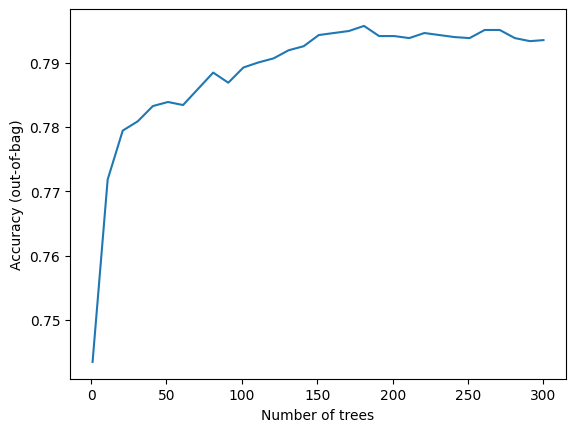

In [54]:
# Create a plot of Accuracy vs Number of trees

logs = RF_1.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [55]:
# Evaluate the model
RF2_inspector = RF_2.make_inspector() # Not the best hyper parameters (80.36% with best parameters)
RF2_inspector.evaluation()

Evaluation(num_examples=6339, accuracy=0.7935005521375611, loss=0.6838419984683505, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

2/2 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.7992
loss: 0.0000
accuracy: 0.7992


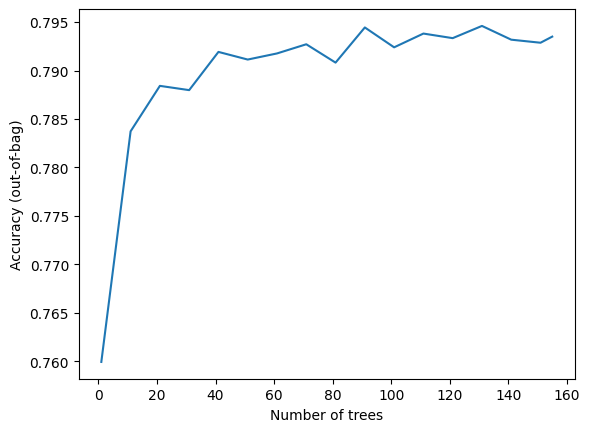

In [56]:
# Evaluation on the validation set
evaluation = RF_2.evaluate(valid_ds, return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

logs = RF_2.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

# Gradient Boosted Tree Model

In [69]:
GB_inspector = GB_1.make_inspector()
GB_inspector.evaluation()

Evaluation(num_examples=None, accuracy=0.7962085604667664, loss=0.8421701788902283, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [70]:
# Evaluation on the validation set
GB_evaluation = GB_1.evaluate(valid_ds, return_dict=True)

for name, value in GB_evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.8018
loss: 0.0000
accuracy: 0.8018


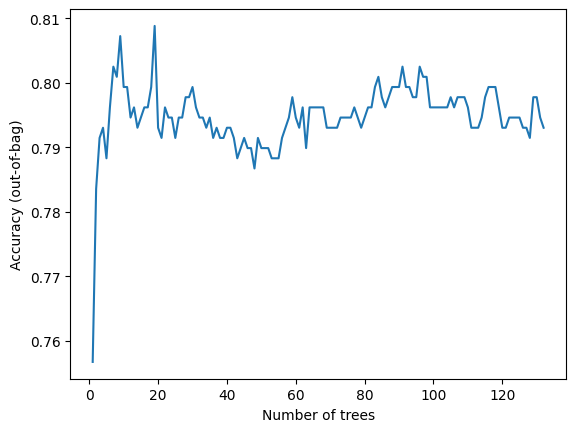

In [71]:
# Create a plot of Accuracy vs Number of trees

logs = GB_1.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

#**Feature Importance Analysis**

We can easily get the most influential features using the function 'variable_importances()' present in the TFDF API. We plotted the importance of each feature that contributes in making predictions.

In [57]:
for importance in RF_inspector.variable_importances().keys():
  print("\t", importance)

	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 NUM_NODES


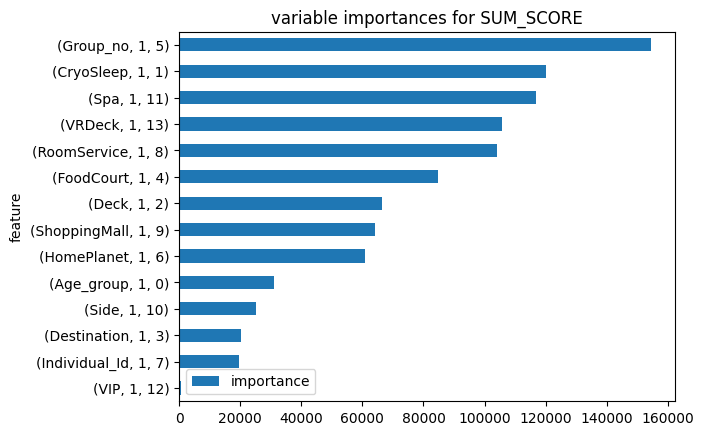

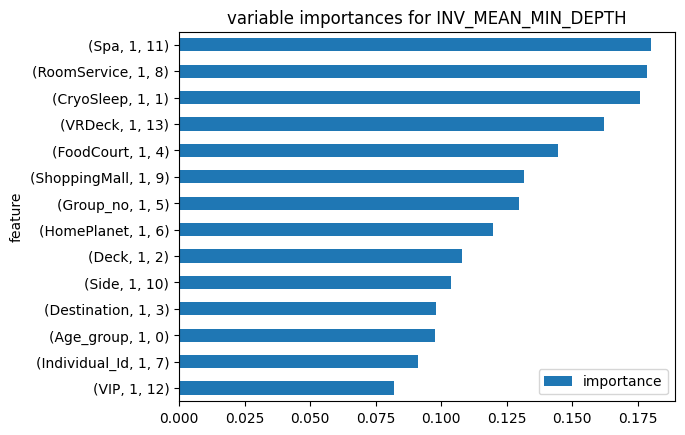

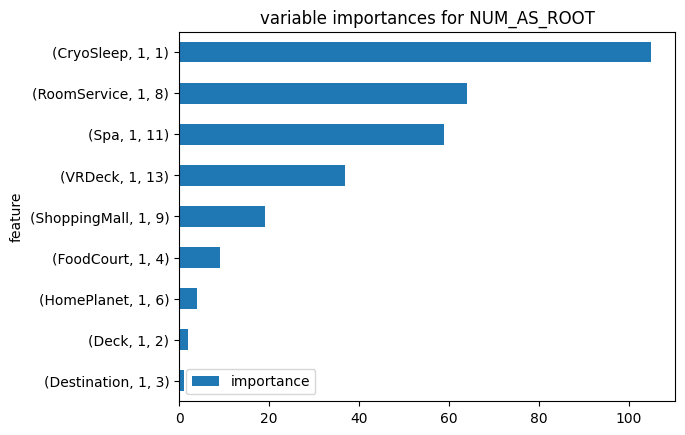

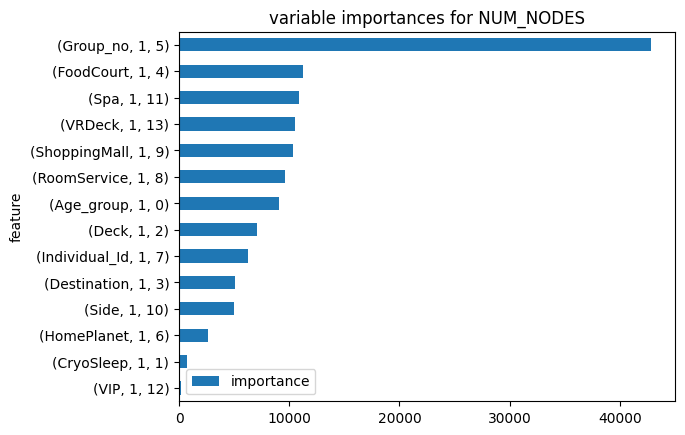

In [58]:
# Variable importance for the above keys.
def plot_var_important(var_important_key,inspector):
  col_name_list,val_list = [],[]
  for col_name,val in inspector.variable_importances()[var_important_key]:
    col_name_list.append(col_name), val_list.append(val)

  data_frame = pd.DataFrame({"feature":col_name_list,"importance":val_list})
  data_frame = data_frame.sort_values(by='importance', ascending=True)
  data_frame.plot.barh(x='feature', y='importance',title="variable importances for "+var_important_key)

for importance in RF_inspector.variable_importances().keys():
  plot_var_important(importance, RF_inspector)

From the feature importance plots, It is obtained that features like VIP, Destination and Individual_ID(Created feature) have less influence on the target variable.

In [59]:
# Define the features to be removed
least_important_features = ['VIP', 'Individual_Id', 'Destination']

# Generate the combinations of removable features to try
feature_combinations = []
for i in range(1, len(least_important_features) + 1):
    for subset in itertools.combinations(least_important_features, i):
        feature_combinations.append(list(subset))

print(feature_combinations)

[['VIP'], ['Individual_Id'], ['Destination'], ['VIP', 'Individual_Id'], ['VIP', 'Destination'], ['Individual_Id', 'Destination'], ['VIP', 'Individual_Id', 'Destination']]


In [60]:
def plot_model_performance(model, valid_ds, label_column):
    # Evaluate the model on the validation dataset
    evaluation = model.evaluate(valid_ds, return_dict=True)

    # Get predictions on the validation set
    predictions = model.predict(valid_ds)
    #true_labels = valid_ds.map(lambda x, y: y).unbatch()
    true_labels = np.concatenate([y.numpy() for _, y in valid_ds], axis = 0)

    # Calculate RMSE and R2 score
    rmse = mean_squared_error(true_labels, predictions, squared=False)
    r2 = r2_score(true_labels, predictions)

    # Plot accuracy, RMSE, and R2 score
    metrics = ['accuracy', 'RMSE', 'R2 Score']
    values = [evaluation['accuracy'], rmse, r2]

    plt.figure(figsize=(10, 5))
    plt.bar(metrics, values, color=['blue', 'orange', 'green'])
    plt.title('Model Performance Metrics')
    plt.ylabel('Metric Value')
    plt.show()

Use /tmp/tmp0h5iig7j as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.226379. Found 6339 examples.
Training model...
Model trained in 0:00:00.604177
Compiling model...
Model compiled.
2/2 [==============================] - 0s 21ms/step


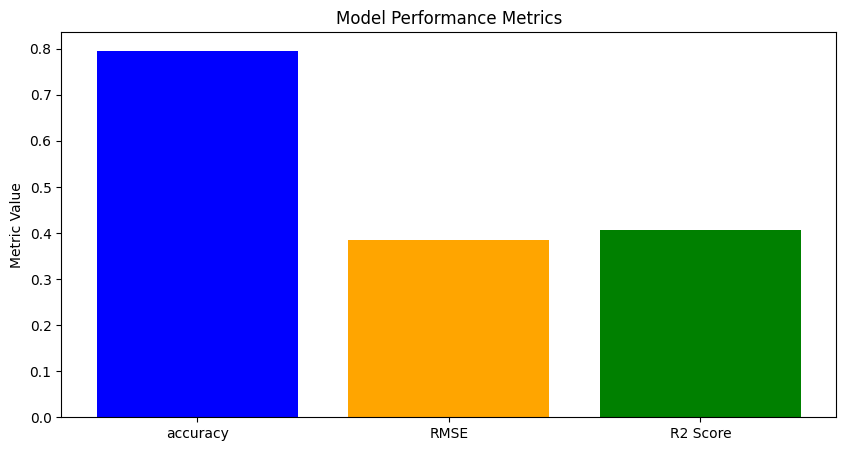

2/2 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.7961
Use /tmp/tmpbnfvx5jt as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.477427. Found 6339 examples.
Training model...
Model trained in 0:00:01.410698
Compiling model...
Model compiled.
2/2 [==============================] - 0s 10ms/step


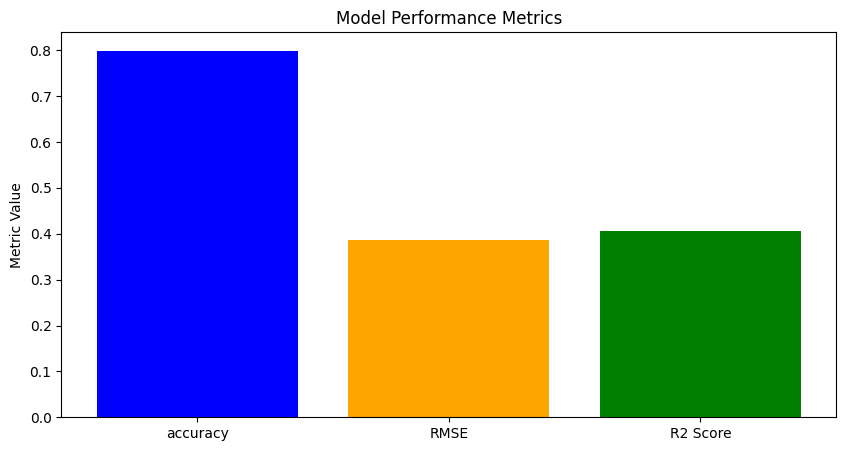

2/2 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.7992
Use /tmp/tmpdi2wwmbq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.297812. Found 6339 examples.
Training model...
Model trained in 0:00:00.605384
Compiling model...
Model compiled.
2/2 [==============================] - 0s 7ms/step


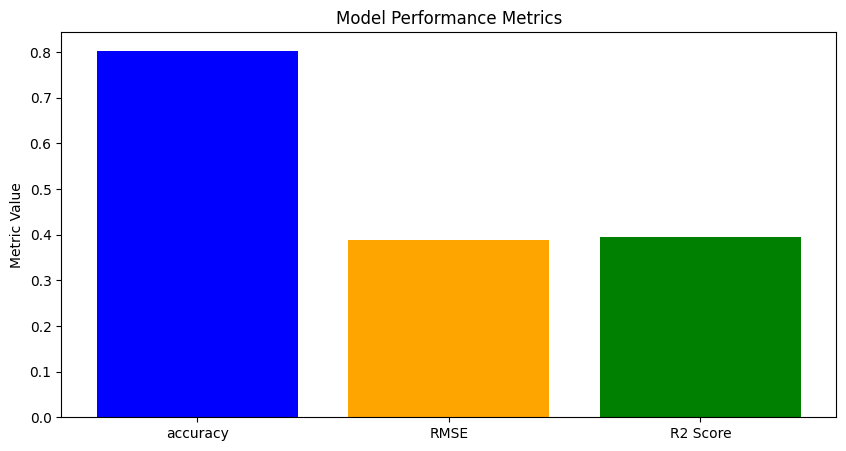

2/2 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.8030
Use /tmp/tmpce50s4_e as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.224073. Found 6339 examples.
Training model...
Model trained in 0:00:00.607355
Compiling model...
Model compiled.
2/2 [==============================] - 0s 11ms/step


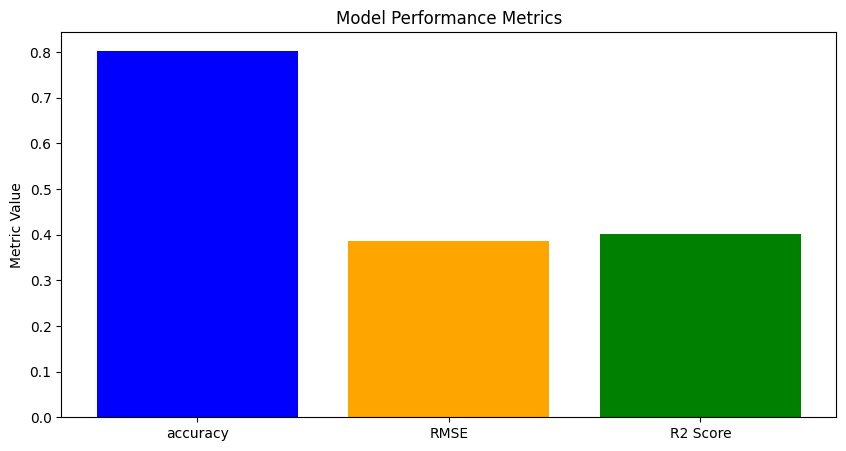

2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.8030
Use /tmp/tmppz2rwz13 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.225737. Found 6339 examples.
Training model...
Model trained in 0:00:00.616692
Compiling model...
Model compiled.
2/2 [==============================] - 0s 10ms/step


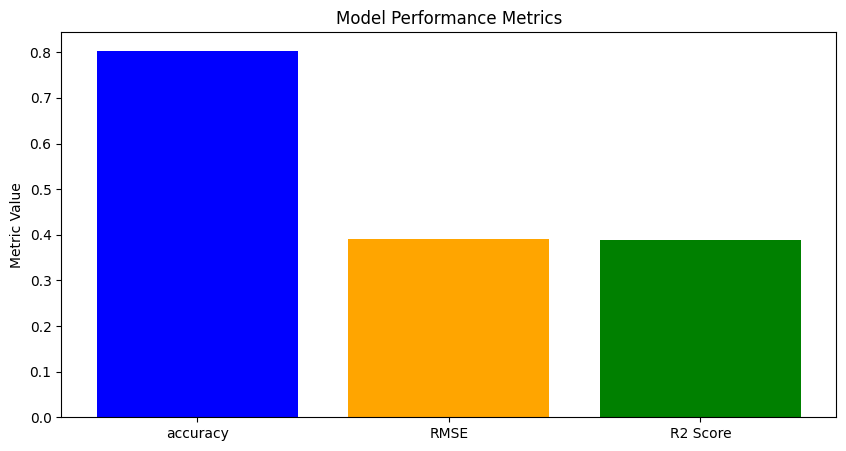

2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.8037
Use /tmp/tmpy9vg9et5 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.223124. Found 6339 examples.
Training model...
Model trained in 0:00:00.612541
Compiling model...
Model compiled.
2/2 [==============================] - 0s 7ms/step


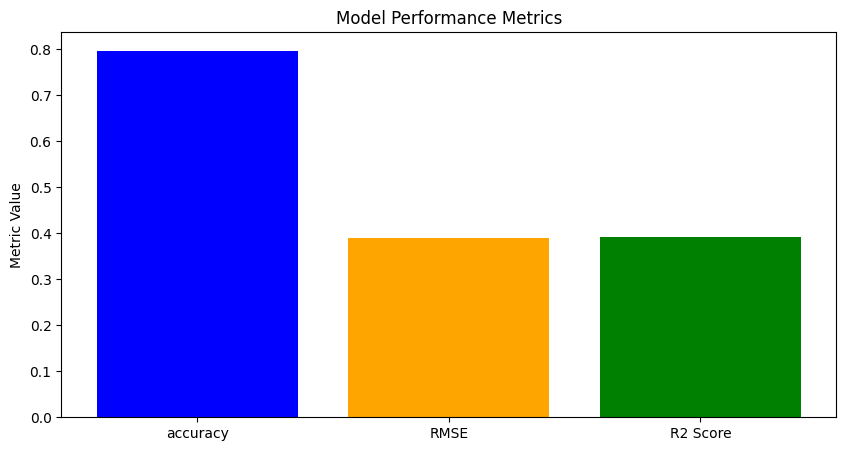

2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.7967
Use /tmp/tmp91p6u4ft as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.214235. Found 6339 examples.
Training model...
Model trained in 0:00:00.610067
Compiling model...
Model compiled.
2/2 [==============================] - 0s 8ms/step


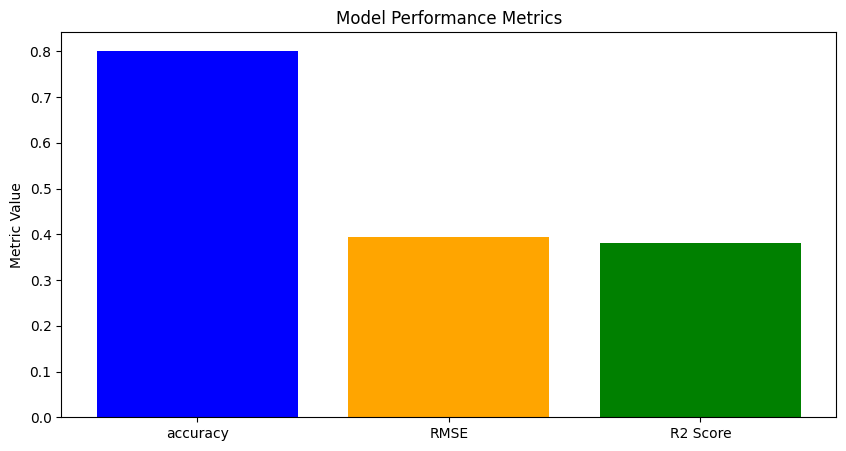

2/2 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.8018
{'features_to_remove': ['VIP'], 'accuracy': 0.7960609793663025}
{'features_to_remove': ['Individual_Id'], 'accuracy': 0.7992376089096069}
{'features_to_remove': ['Destination'], 'accuracy': 0.8030495643615723}
{'features_to_remove': ['VIP', 'Individual_Id'], 'accuracy': 0.8030495643615723}
{'features_to_remove': ['VIP', 'Destination'], 'accuracy': 0.8036848902702332}
{'features_to_remove': ['Individual_Id', 'Destination'], 'accuracy': 0.7966963052749634}
{'features_to_remove': ['VIP', 'Individual_Id', 'Destination'], 'accuracy': 0.8017789125442505}
Highest accuracy: 0.8037 with features to remove: ['VIP', 'Destination']


In [63]:
# Initialize an empty list to store model performance
model_performance = []

# Iterate over each combination of features to remove
for features_to_remove in feature_combinations:
    # Create a copy of the training dataset and remove the specified features
    reduced_train_ds = train_ds_pd.copy()

    for feature in features_to_remove:
        reduced_train_ds.pop(feature)

    reduced_train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(reduced_train_ds, label=label)
    # Train the Random Forest model on the reduced training dataset
    #RF_3 = tfdf.keras.RandomForestModel()

    # Crete the model with best obtained hyper parameters
    RF_3 = tfdf.keras.RandomForestModel(compute_oob_performances=True, max_depth = 8, min_examples = 5, num_trees = 135) # Need to try
    RF_3.compile(metrics=["accuracy"])
    RF_3.fit(x=reduced_train_ds)

    RF3_inspector = RF_3.make_inspector()
    RF3_inspector.evaluation()

    label_column = label
    plot_model_performance(RF_3, valid_ds, label_column)

    # Evaluate the model on the test set
    evaluation = RF_3.evaluate(valid_ds, return_dict=True)
    accuracy = evaluation['accuracy']

    # Store the model performance for this combination of features
    model_performance.append({
        'features_to_remove': features_to_remove,
        'accuracy': accuracy
    })

# Print the model performance for all combinations of features
for result in model_performance:
    print(result)

# Select the combination of features that results in the highest accuracy
highest_accuracy_result = max(model_performance, key=lambda x: x['accuracy'])
print(f"Highest accuracy: {highest_accuracy_result['accuracy']:.4f} with features to remove: {highest_accuracy_result['features_to_remove']}")

In [64]:
RF_4 = tfdf.keras.RandomForestModel(compute_oob_performances=True, max_depth = 8, min_examples = 5, num_trees = 135) # Need to try
RF_4.compile(metrics=["accuracy"])
RF_4.fit(x=reduced_train_ds)

RF4_inspector = RF_4.make_inspector()
RF4_inspector.evaluation()

Use /tmp/tmpdvlwfd5n as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.202102. Found 6339 examples.
Training model...
Model trained in 0:00:00.617645
Compiling model...
Model compiled.


Evaluation(num_examples=6339, accuracy=0.7927117841930904, loss=1.364807026378345, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [65]:
# Save the best model
RF_3.save('RF_3.keras')

In [ ]:
y_pred = RF_1.predict(test_df)

#**Conclusion**

Model achieved reasonable accuracy of . By performing rigorous pre-processing could achieve even better accuracy. In this case, Categorizing age column into multiple groups can make the model perform even better.



#**References**

https://www.tensorflow.org/decision_forests/tutorials/advanced_colab
https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel
https://medium.com/@shahcheril311/training-tree-based-models-with-tf-decision-forests-5eb98860c155